In [44]:
#importimg basic libraries

import matplotlib.pyplot as plt


In [45]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [46]:
#downloading data set from kaggle
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
#extracting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [48]:
#importing required libraries to build cnn

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

In [49]:
#creating generators to load large amount of data
train_data = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_data = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [50]:
#normalizing the data

def normalize (image, label):
  image = tensorflow.cast(image/255. , tensorflow.float32)
  return image, label

train_data = train_data.map(normalize)
validation_data = validation_data.map(normalize)

Model building

In [51]:


model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3),padding = 'valid',activation ='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3),padding = 'valid',activation ='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3),padding = 'valid',activation ='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))



In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [53]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [54]:
#fitting the model

history = model.fit(train_data, epochs = 10, validation_data = validation_data)

Epoch 1/10
625/625 [==============================] - 67s 103ms/step - loss: 1.1080 - accuracy: 0.5998 - val_loss: 0.5877 - val_accuracy: 0.6886
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 0.5550 - accuracy: 0.7153 - val_loss: 0.4991 - val_accuracy: 0.7624
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4953 - accuracy: 0.7693 - val_loss: 0.6255 - val_accuracy: 0.7238
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4013 - accuracy: 0.8217 - val_loss: 0.4521 - val_accuracy: 0.7894
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3336 - accuracy: 0.8555 - val_loss: 0.4328 - val_accuracy: 0.8044
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2543 - accuracy: 0.8936 - val_loss: 0.4903 - val_accuracy: 0.7948
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1859 - accuracy: 0.9240 - val_loss: 0.4958 - val_ac

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Model Performance**

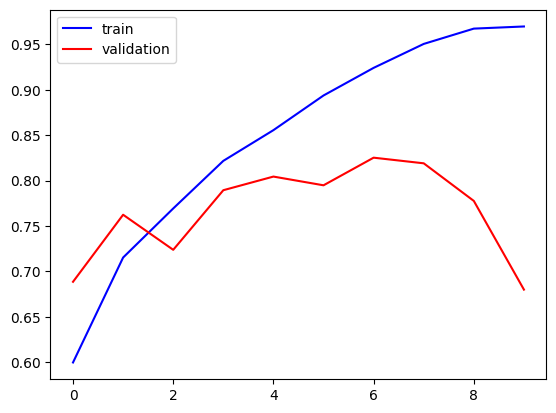

In [56]:
#ploting the model performance

plt.plot(history.history['accuracy'], color = 'b', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'r', label = 'validation')
plt.legend()
plt.show()

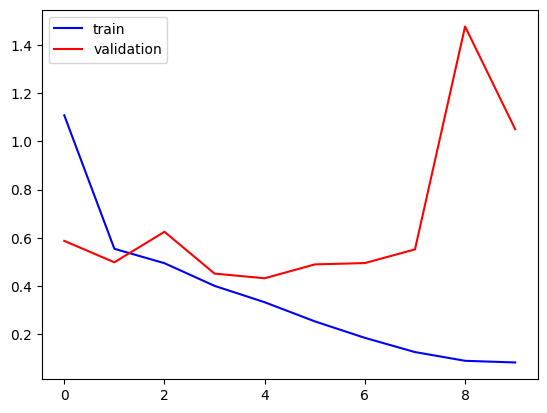

In [57]:
#plotting losses of model

plt.plot(history.history['loss'], color = 'b', label = 'train')
plt.plot(history.history['val_loss'], color = 'r', label = 'validation')
plt.legend()
plt.show()

In [58]:
import cv2

In [59]:
test_image = cv2.imread('/content/dog.jpg')

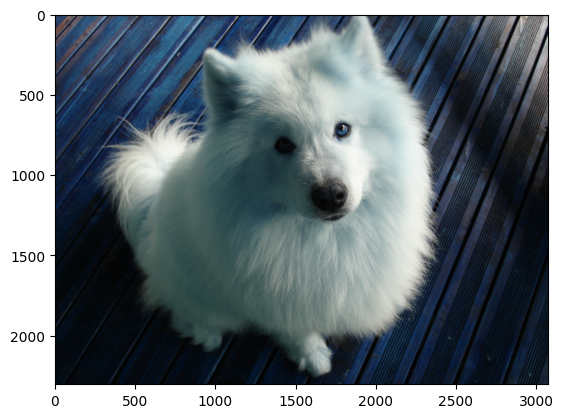

In [60]:
plt.imshow(test_image)

In [61]:
test_image.shape

(2304, 3072, 3)

In [62]:
test_image = cv2.resize(test_image, (256,256))

In [63]:
test_input = test_image.reshape((1,256,256,3))

In [64]:
model.predict(test_input)

1/1 [==============================] - 0s 119ms/step


array([[1.]], dtype=float32)

Model Predicted test imag as Dog

because of binary classification 0 is cat and 1 is Dog


Accuracy of model is **approx 97%**. After plotting we can observe that model is **slightly overfitted**.

stpes we can take to reduce overfitting and improve accuracy on test data as well is

**Data Augmentation**

**L1/L2 Regularizer**